# Embedding space

This document will explore the training and analysis of our embedding space.

In [ ]:
%pip install scipy==1.10.0
%pip install gensim
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install pacmap

In [1]:
import csv
import pandas as pd
from gensim.test.utils import datapath
from gensim import utils
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt
import pacmap



In [2]:
with open('sequences.csv', 'r') as f:
    reader = csv.reader(f)
    sequences = list(reader)

In [3]:
model = Word2Vec(sentences=sequences,   # This is the data that we wish to create notes on. This will take all unique words (stations) and put them in the NN
                 vector_size=300,       # Amount of dimension
                 min_count=10,          # If the number of occurences of this station is less than 10, then we are not interested in having it in our embedding. -- THIS NEED TO BE LOOKED AT
                 workers=4              # Amount of cores used for training and so forth.
                 )         

model.build_vocab(sequences)
model.train(sequences, total_examples=model.corpus_count, epochs=1)


(3763908, 6938614)

In [8]:
model.wv.vectors

array([[-1.1145253e-01,  2.4456686e-01, -1.1813354e-01, ...,
        -4.4063400e-02,  1.5732598e-01, -1.8164229e-01],
       [-9.3137048e-02,  1.6235070e-02, -4.4549513e-01, ...,
        -2.7836251e-01, -6.6736662e-01, -1.3148725e-01],
       [-5.6608599e-02,  2.9980692e-01, -1.9684979e-01, ...,
        -1.2284568e-01,  7.4535064e-02, -6.7708427e-01],
       ...,
       [ 1.0204450e-02,  2.2995681e-02, -1.1330484e-03, ...,
        -8.5344566e-03,  8.3930623e-03, -2.1721164e-03],
       [ 4.6277627e-02,  7.3329195e-02, -3.4616962e-02, ...,
        -4.3920811e-02,  5.9085065e-03, -2.1431424e-02],
       [ 1.1426177e-02,  4.4443745e-02,  3.3274041e-03, ...,
        -3.3842489e-02,  2.1693392e-03,  1.7484988e-04]], dtype=float32)

In [5]:
embeddings_matrix = model.wv['København H']

# Initialize and fit PaCMAP
pacmap = pacmap.PaCMAP()
embedded_data = pacmap.fit_transform(embeddings_matrix)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], alpha=0.5)

# Add labels to some points (optional)
# You can add labels to specific points if you have a list of words you want to label
# Replace label_words with the list of words you want to label
label_words = ["København H", "CPH Lufthavn", "Nørreport St. (Metro)"]
for word in label_words:
    idx = model.wv.key_to_index[word]
    plt.text(embedded_data[idx, 0], embedded_data[idx, 1], word, fontsize=12)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('PaCMAP Visualization of Word Embeddings')
plt.grid(True)
plt.show()

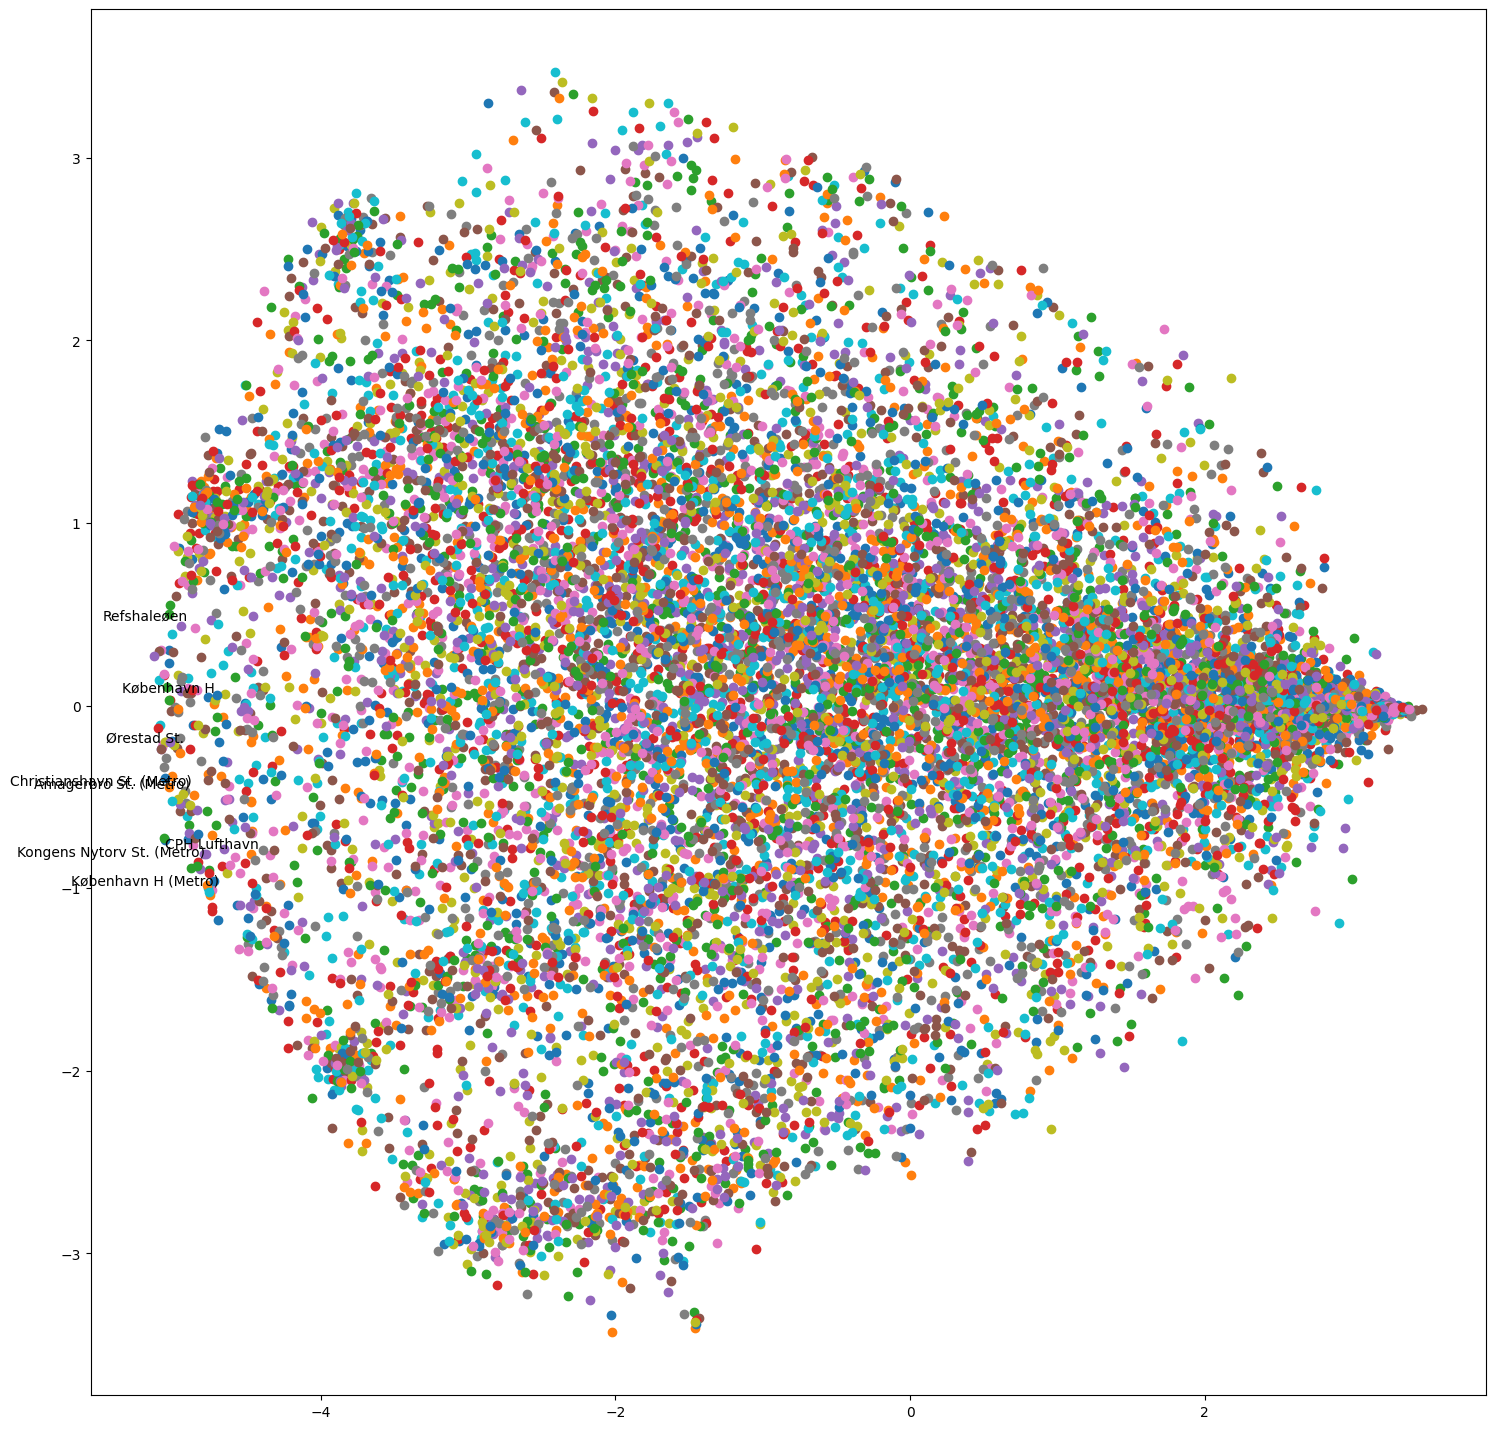

In [14]:
from matplotlib import pyplot as plt


def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []
    top_10 = ['København H', 'Nørreport St', 'Kongens Nytorv St. (Metro)', 'CPH Lufthavn', 'Refshaleøen', 'Ørestad St.', 'København H (Metro)', 'Christianshavn St. (Metro)', 'Amagerbro St. (Metro)']

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        if word in top_10:
            labels.append(word)
        else:
            labels.append(None)
    
    tsne_model = TSNE(perplexity=5000, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        if labels[i] in top_10:
            plt.annotate(labels[i],
                        xy=(x[i], y[i]),
                        xytext=(5, 2),
                        textcoords='offset points',
                        ha='right',
                        va='bottom')
    plt.show()
   
tsne_plot(model)

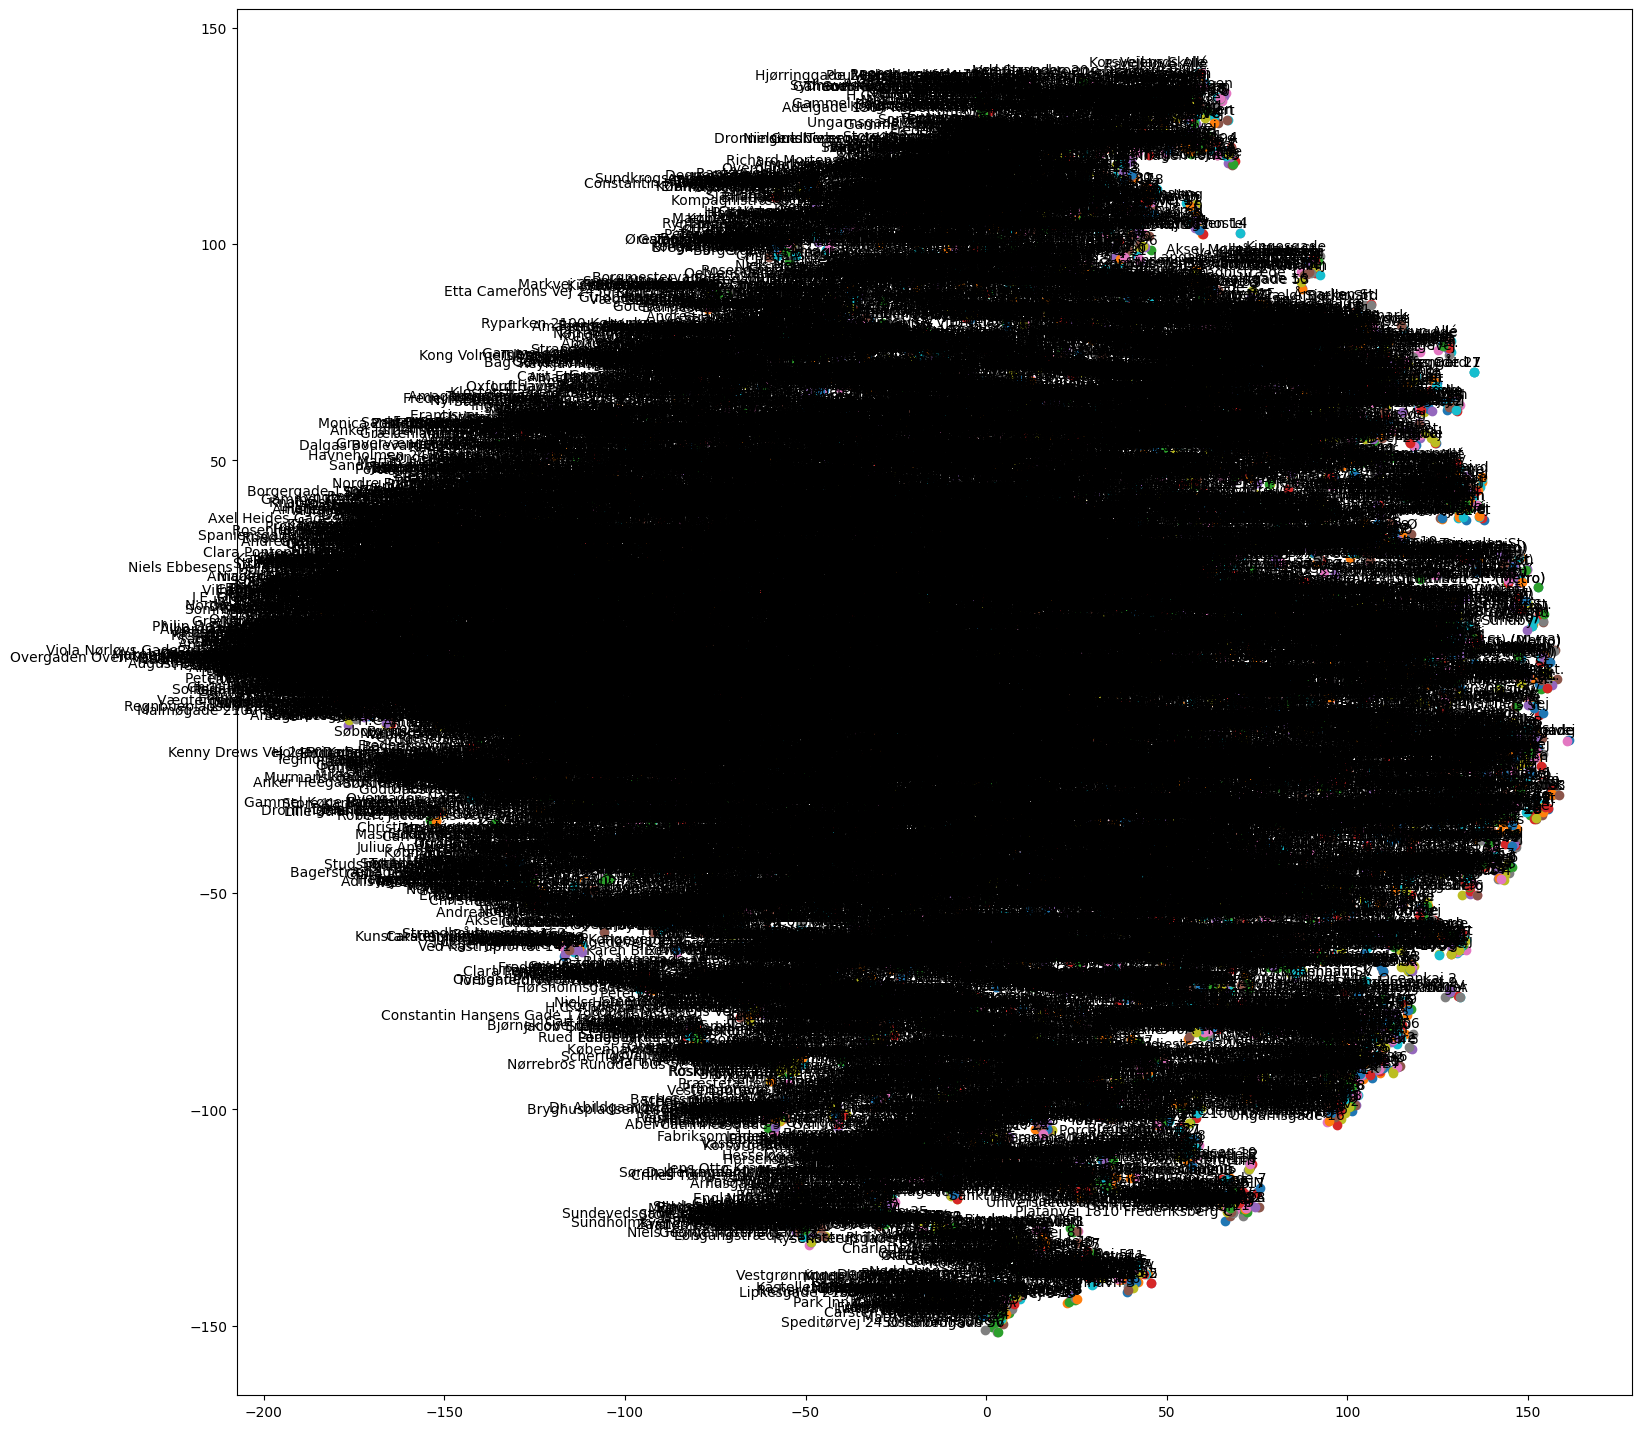

In [10]:
def tsne_plot_plex_10(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot_plex_10(model)

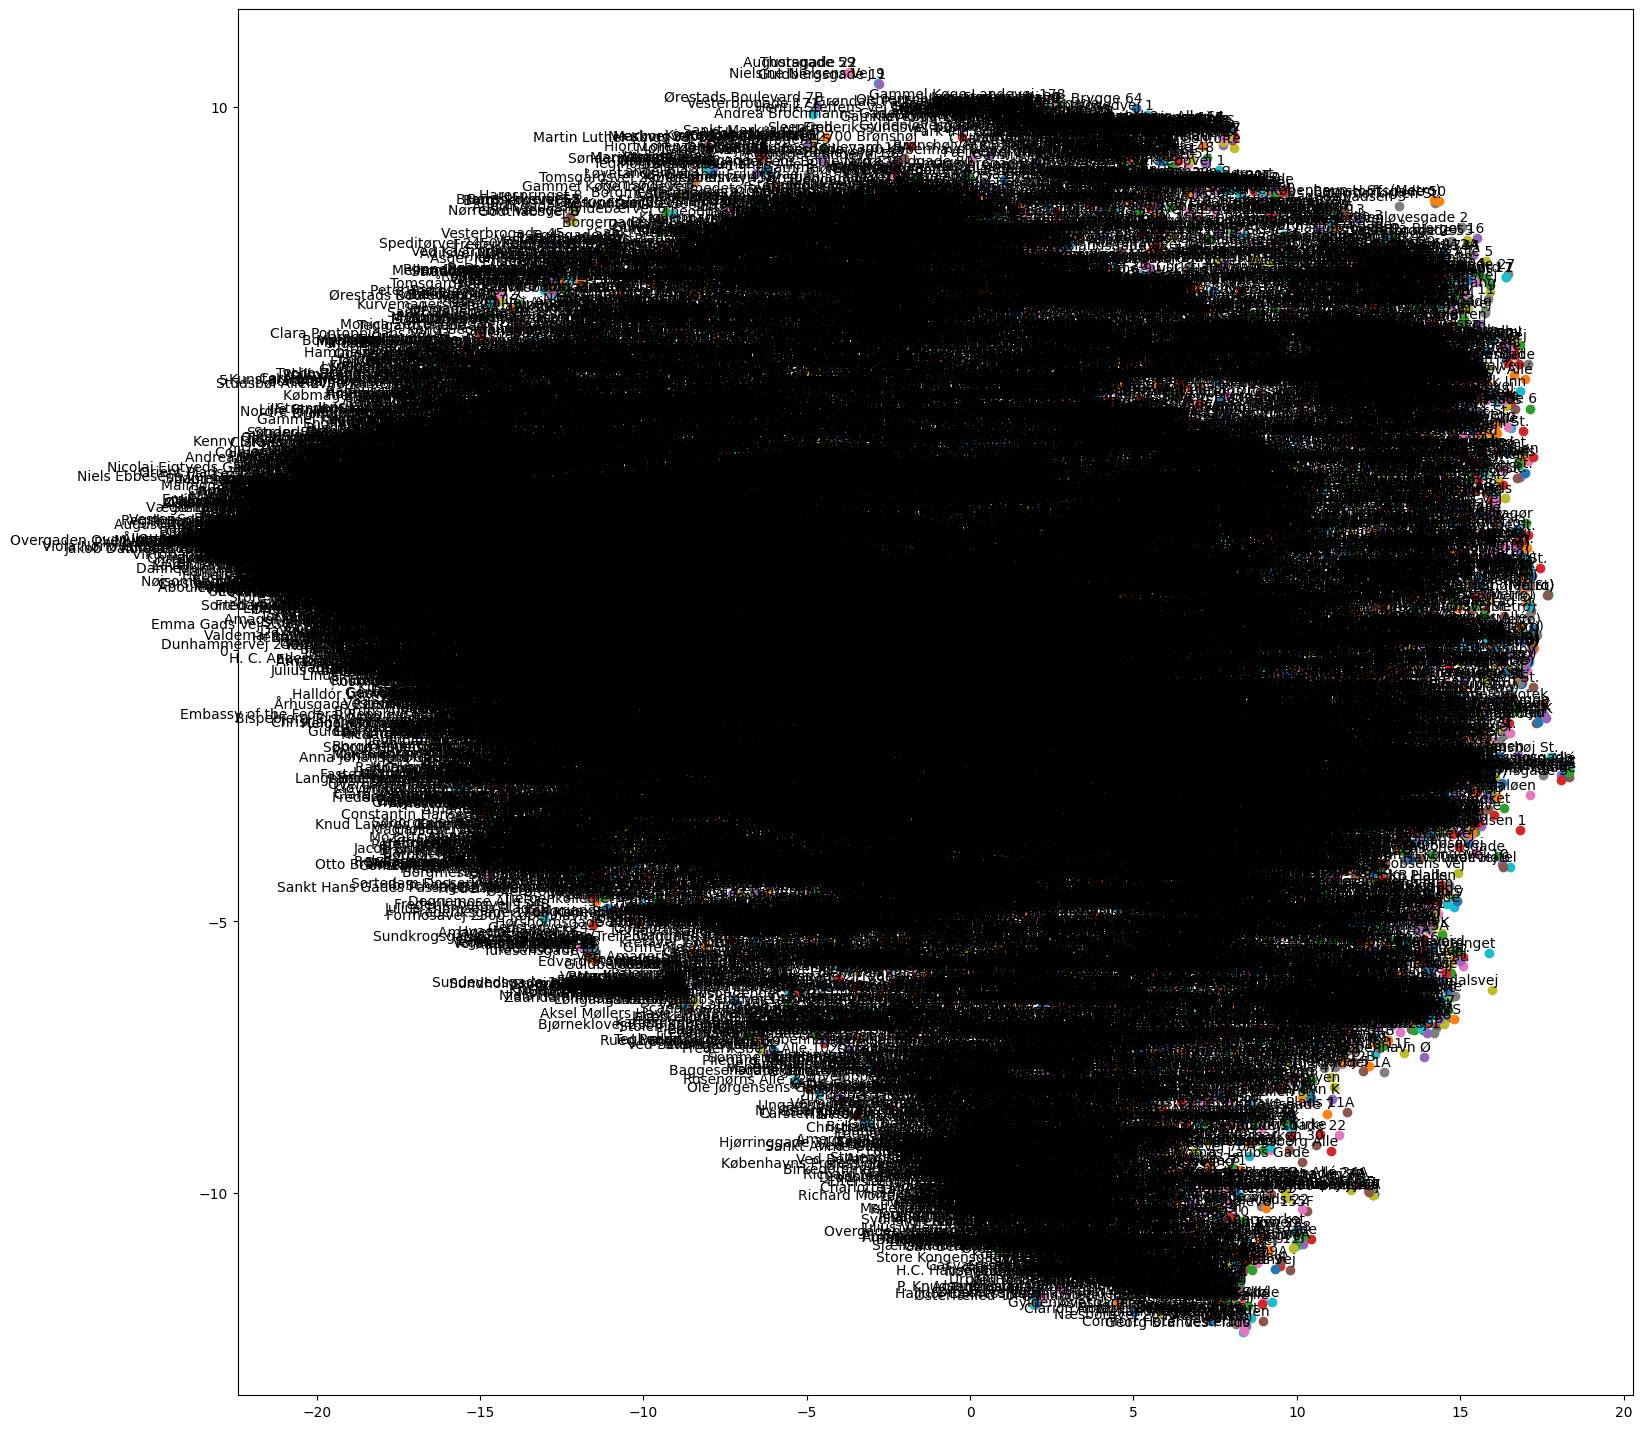

In [11]:
def tsne_plot_plex_500(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=500, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot_plex_500(model)